In [44]:
import pandas as pd
import numpy as ny
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns



In [10]:
train_data = pd.read_csv('heart-train.csv')
train_data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
1,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0
2,142,4.05,3.38,16.20,Absent,59,20.81,2.62,38,0
3,114,4.08,4.59,14.60,Present,62,23.11,6.72,58,1
4,114,0.00,3.83,19.40,Present,49,24.86,2.49,29,0


**1. Identify the dataset columns into nominal, categorical, continuous, etc. categories**

In [13]:

def categorize_columns(data):
    nominal_columns = []
    categorical_columns = []
    continuous_columns = []
    ordinal_columns = []

    for column in data.columns:
        if data[column].dtype == 'object':
            nominal_columns.append(column)
        elif data[column].nunique() <= 2:
            categorical_columns.append(column)
        else:
            continuous_columns.append(column)

    return nominal_columns, categorical_columns, continuous_columns, ordinal_columns

nominal_cols, categorical_cols, continuous_cols, ordinal_cols = categorize_columns(train_data)

print("Nominal Columns:", nominal_cols)
print("Categorical Columns:", categorical_cols)
print("Continuous Columns:", continuous_cols)
print("Ordinal Columns:", ordinal_cols)


Nominal Columns: ['famhist']
Categorical Columns: ['chd']
Continuous Columns: ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
Ordinal Columns: []


**2. Present insights about the data.**

              sbp     tobacco         ldl   adiposity       typea     obesity  \
count  412.000000  412.000000  412.000000  412.000000  412.000000  412.000000   
mean   139.240291    3.666262    4.589539   25.151214   52.135922   25.802112   
std     20.451903    4.518501    1.883744    7.740794    9.592727    4.081745   
min    101.000000    0.000000    0.980000    6.740000   20.000000   17.890000   
25%    125.500000    0.037500    3.240000   19.397500   46.000000   22.737500   
50%    136.000000    1.805000    4.225000   26.090000   52.000000   25.635000   
75%    148.000000    5.850000    5.527500   30.755000   58.000000   28.167500   
max    218.000000   27.400000   14.160000   42.490000   73.000000   45.720000   

          alcohol         age         chd  
count  412.000000  412.000000  412.000000  
mean    18.030073   42.686893    0.332524  
std     25.298909   15.129338    0.471690  
min      0.000000   15.000000    0.000000  
25%      0.447500   30.750000    0.000000  
50%   

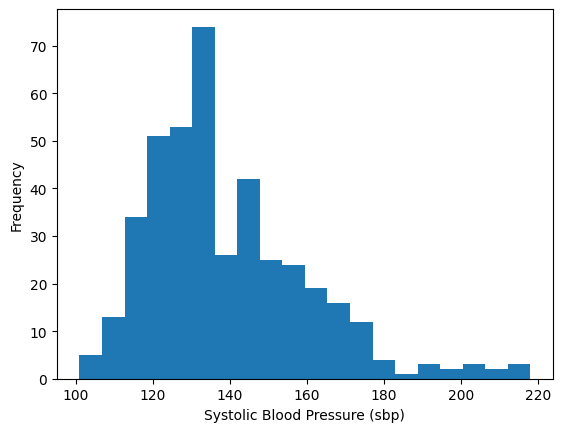

Absent     239
Present    173
Name: famhist, dtype: int64


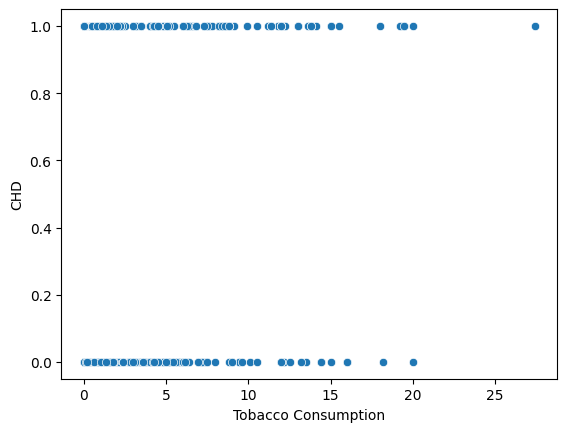

famhist
Absent     0.251046
Present    0.445087
Name: chd, dtype: float64


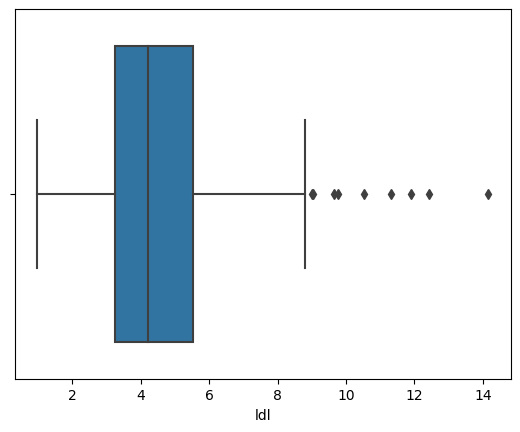

In [24]:
train_data.info

summary_stats = train_data.describe()
print(summary_stats)

#histogram
plt.hist(train_data['sbp'], bins=20)
plt.xlabel('Systolic Blood Pressure (sbp)')
plt.ylabel('Frequency')
plt.show()

#occurence of unique values in in a categorical column
famhist_counts = train_data['famhist'].value_counts()
print(famhist_counts)

# Creating a scatter plot of tobacco and chd variables
sns.scatterplot(x='tobacco', y='chd', data=train_data)
plt.xlabel('Tobacco Consumption')
plt.ylabel('CHD')
plt.show()

# Calculate group statistics
group_means = train_data.groupby('famhist')['chd'].mean()
print(group_means)

# Box plot to identify outliers
sns.boxplot(x=train_data['ldl'])
plt.show()








In [2]:
# 3. Find the number of null values for each column.
df_heart = pd.read_csv("heart-train.csv")

print("Shape of Heart-test CSV : ",df_heart.shape) # 412, 10

# null values of Heart_complete CSV
print("Null values for each columns of Heart CSV :",df_heart.isnull().sum())


Shape of Heart-test CSV :  (412, 10)
Null values for each columns of Heart CSV : sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64


In [3]:
# 4.a) Find the oldest person
oldest_person_age = df_heart[df_heart['age'] == df_heart['age'].max()].iloc[0]
print(oldest_person_age)


sbp             158
tobacco         3.6
ldl            2.97
adiposity     30.11
famhist      Absent
typea            63
obesity       26.64
alcohol       108.0
age              64
chd               0
Name: 58, dtype: object


In [4]:
# 4.b) Find the youngest person
youngest_person_age = df_heart[df_heart['age'] == df_heart['age'].min()].iloc[0]
print(youngest_person_age)

sbp             132
tobacco         0.0
ldl            1.87
adiposity     17.21
famhist      Absent
typea            49
obesity       23.63
alcohol        0.97
age              15
chd               0
Name: 9, dtype: object


In [6]:
# 4.c) Find the average age group

age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

df_heart['Age_Group'] = pd.cut(df_heart['age'], bins=age_bins)

average_age_by_group = df_heart.groupby('Age_Group')['age'].mean()

print("Average age within each custom age group:")
print(average_age_by_group)

Average age within each custom age group:
Age_Group
(10, 20]     16.912281
(20, 30]     26.739130
(30, 40]     35.809524
(40, 50]     45.318681
(50, 60]     56.324074
(60, 70]     62.340426
(70, 80]           NaN
(80, 90]           NaN
(90, 100]          NaN
Name: age, dtype: float64


In [ ]:
# 4.d) Find median age
person_age_median = ny.median(df_heart['age'])
print("Median of age group :",person_age_median)

Median of age group : 45.0


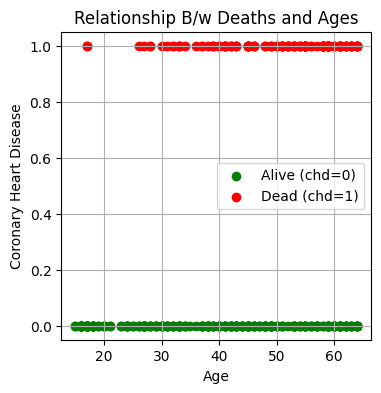

In [26]:
# 4.e. Find the relationship between the deaths and ages(the class column is your prediction variable)
df_heart = pd.read_csv('heart-train.csv')

chd_0_df = df_heart[df_heart['chd'] == 0]
chd_1_df = df_heart[df_heart['chd'] == 1]

plt.figure(figsize=(4, 4))
plt.scatter(chd_0_df['age'], chd_0_df['chd'], color='green', label='Alive (chd=0)')
plt.scatter(chd_1_df['age'], chd_1_df['chd'], color='red', label='Dead (chd=1)')
plt.xlabel('Age')
plt.ylabel('Coronary Heart Disease')
plt.grid()
plt.title('Relationship B/w Deaths and Ages')
plt.legend()
plt.show()


In [8]:
# 4.f. Find the age groups whose survival rate is the largest


bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['10-20','20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'age_group' based on the age bins
df_heart['age_group'] = pd.cut(df_heart['age'], bins=bins, labels=labels)

# Calculate the survival for these groups
survial_rate = df_heart.groupby('age_group')['chd'].mean()
survial_rate_largest = survial_rate.idxmin()
print('survial rate is largest for : ', survial_rate_largest)


survial rate is largest for :  10-20


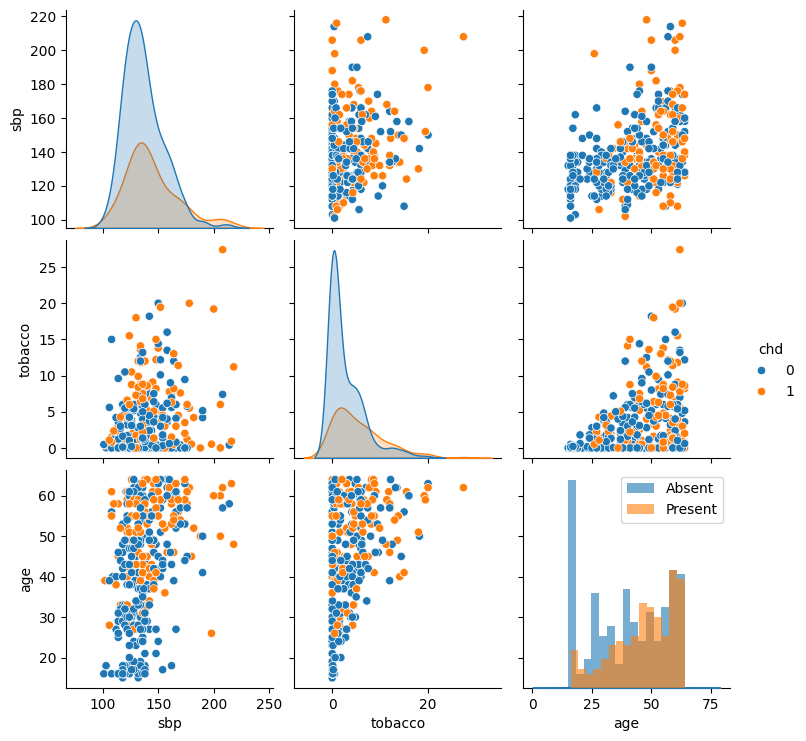

In [ ]:
# 4.g. Find similar relationships for at least 3-4 columns that you think can play a role in prediction

df_heart = pd.read_csv("heart-train.csv")

numeric_columns_of_dataset = df_heart.select_dtypes(include=['number'])

correlation_matrix = numeric_columns_of_dataset.corr()

sns.pairplot(df_heart, vars=["sbp", "tobacco", "age"], hue="chd", diag_kind="kde")

df_heart.groupby('famhist')['age'].hist(alpha=0.6, bins=15, legend=True)

plt.show()

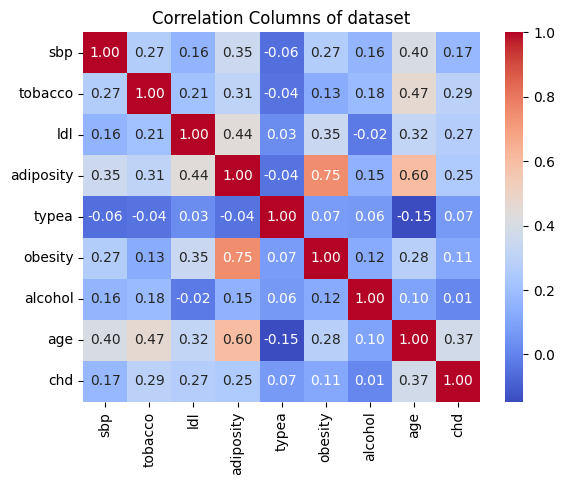

In [ ]:
# 4.h. Get more visuals on data distributions
#i. Use plotCorrelationMatrix
#ii. plotScatterMatrix
#iii. plotPerColumnDistribution

df_heart = pd.read_csv("heart-train.csv")

numeric_columns_of_dataset = df_heart.select_dtypes(include=['number'])

correlation_columns = numeric_columns_of_dataset.corr()

sns.heatmap(correlation_columns, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Columns of dataset')
plt.show()


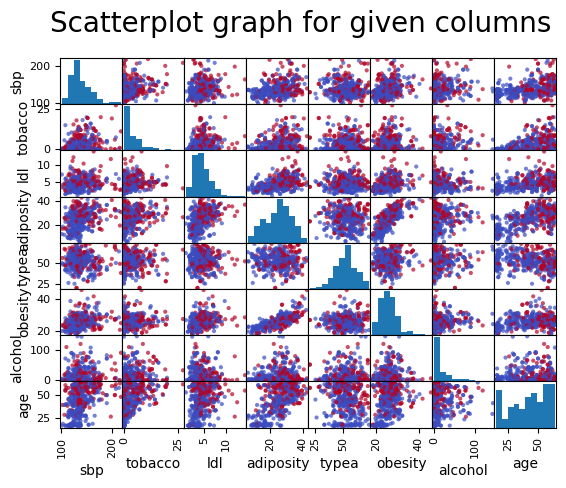

In [ ]:

from pandas.plotting import scatter_matrix

df_heart = pd.read_csv('heart-train.csv')

numeric_columns_of_dataset = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

scatter_matrix(df_heart[numeric_columns_of_dataset], alpha=0.7, diagonal='hist', c=df_heart['chd'], cmap='coolwarm')

plt.suptitle("Scatterplot graph for given columns", size=20)
plt.show()


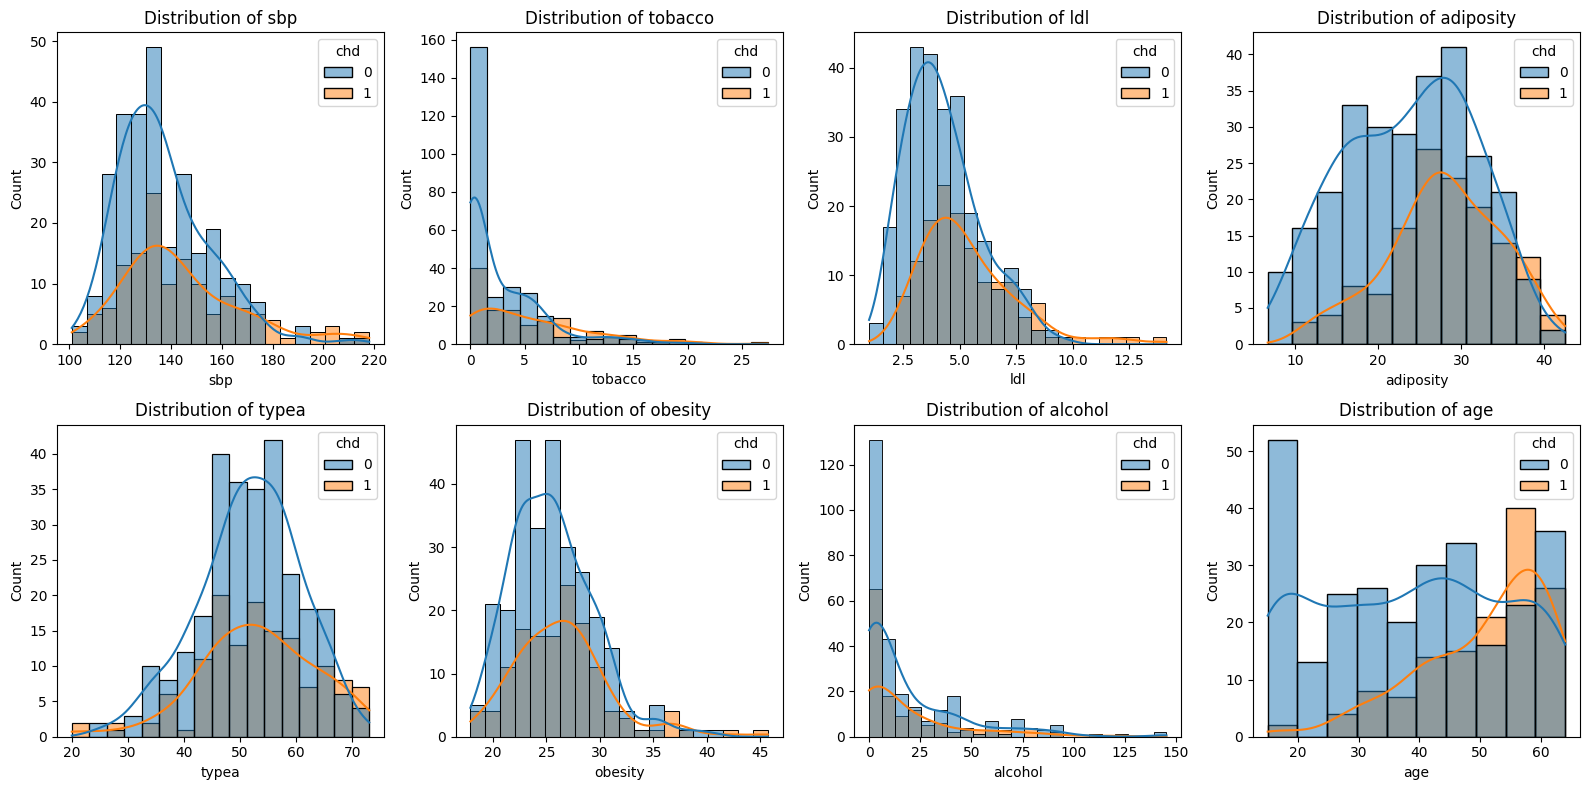

In [ ]:

numeric_columns_of_dataset = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(wspace=0.5)
axes = axes.ravel()

for i, col in enumerate(numeric_columns_of_dataset):
    sns.histplot(data=df_heart, x=col, hue='chd', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


Missing Values of Particular column:  sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64
Missing Values of gievn heart dataset:  0


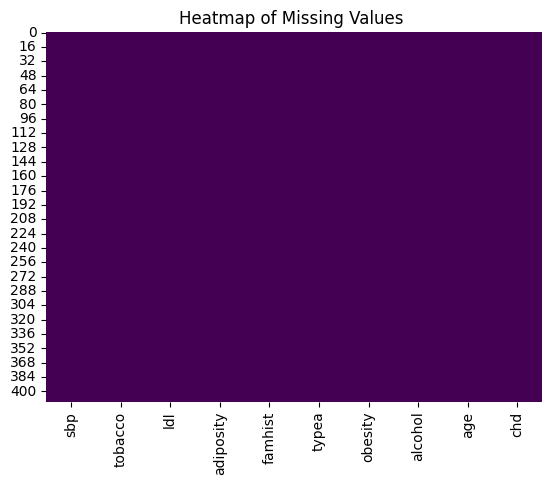

In [ ]:
#i. Check for the missing values, If they exist
    #i. Find missing values
    #ii. Get the count of missing values

df_heart = pd.read_csv('heart-train.csv')

missing_Column_values = df_heart.isnull().sum()

print("Missing Values of Particular column: " , missing_Column_values)

total_missing_Column_values = missing_Column_values.sum()
print("Missing Values of gievn heart dataset: ", total_missing_Column_values)

    #iii. Plot a heat map for missing values

sns.heatmap(df_heart.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values ')
plt.show()



 4.j. Check for missing values and What additional techniques to handle null values, xcluding the drop na feature?

1) Null values can be replaced with statistical measures mean/mode/median or specific selected values. Also, previous/after cell values can be filled into null value column.

2) Based on available values, Null values can we predict.


Applying the regression models that is given below.
Use the following Logistic regression to handle the classification problems
logistic_regression = LogisticRegression()
logistic_regression.fit(X,Y)
print("Train: ", logistic_regression.score(X, Y))
print("Test: ", logistic_regression.score(x, y))
print("MSE:”,mean_squared_error(logistic_regression.predi
ct(x), y, squared=True))
pred_lreg = logistic_regression.predict(test)

In [6]:
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

df_heart = pd.read_csv('heart-train.csv')

X = df_heart[['ldl','age','tobacco','sbp','obesity','adiposity','typea','alcohol']]
Y = df_heart['chd']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

Y_train_pred = logistic_regression.predict(X_train)
Y_test_pred = logistic_regression.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

# Calculate mean squared error
train_mse = mean_squared_error(Y_train, Y_train_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)

Train Accuracy: 0.7708333333333334
Test Accuracy: 0.6774193548387096
Train Mean Squared Error: 0.22916666666666666
Test Mean Squared Error: 0.3225806451612903


### **PART-B**

1. Load the dataset and perform initial data exploration

In [31]:
import pandas as pd

df = pd.read_csv("Price.csv")

print("First five rows of the dataset:")
print(df.head())

print("Size of the dataset:")
print(df.size)

num_rows, num_columns = df.shape
print(f"\nNumber of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

# Get the names of all columns
column_names = df.columns
print("\nColumn Names:")
print(column_names)

print("\nInfo")
print(df.info())






First five rows of the dataset:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0         3       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0         5       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0         3       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0         3       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_

2. Identify the types of variables present and categorize them

In [ ]:
#Identifying all the datatypes available

variable_types = df.dtypes
print("Types of variables:")
print(variable_types)

#categorzing all the variable_types

from numpy import int64
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features=df.select_dtypes(include=['object']).columns
print("\nNumerical Features:")
for num_feature in numerical_features:
    print("- " + num_feature)

print("\nCategorical Features:")
for cat_feature in categorical_features:
    print("- " + cat_feature)

Types of variables:
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

Numerical Features:
- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot
- floors
- waterfront
- view
- condition
- sqft_above
- sqft_basement
- yr_built
- yr_renovated

Categorical Features:
- date
- street
- city
- statezip
- country


In [33]:
#3. Obtain insights about the data.
# Get the count of unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
unique_value_counts = {}
for column in categorical_columns:
    unique_value_counts[column] = df[column].nunique()

print("\nCount of Unique Values for Categorical Columns:")
print(unique_value_counts)

correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

most_common_city = df['city'].mode()[0]
print("\nMost Common City:", most_common_city)

df['price_per_bedroom'] = df['price'] / df['bedrooms']
average_price_per_bedroom = df['price_per_bedroom'].mean()
print("\nAverage Price per Bedroom:", average_price_per_bedroom)

oldest_property = df[df['yr_built'] == df['yr_built'].min()]
newest_property = df[df['yr_built'] == df['yr_built'].max()]
print("\nOldest Property:")
print(oldest_property)
print("\nNewest Property:")
print(newest_property)



Count of Unique Values for Categorical Columns:
{'date': 70, 'street': 4525, 'city': 44, 'statezip': 77, 'country': 1}

Correlation Matrix:
                  price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.050451  0.151461   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.068819  0.177895   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.107837  0.486428   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.210538  0.344850   
sqft_lot       0.050451  0.068819   0.107837     0.210538  1.000000  0.003750   
floors         0.151461  0.177895   0.486428     0.344850  0.003750  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017241  0.022024   
view           0.228504  0.111028   0.211960     0.311009  0.073907  0.031211   
condition      0.034915  0.025080  -0.119994    -0.062826  0.000558 -0.275013   
sqft_above     0.367570  0.484705   0.689918     

<ipython-input-33-19d05b1072c1>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [34]:
#4.  Count missing values for each column
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print("Number of Missing Values for Each Column:")
print(missing_values)


Number of Missing Values for Each Column:
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated         0
street               0
city                 0
statezip             0
country              0
price_per_bedroom    0
dtype: int64


 **5. Calculate summary statistics for numerical columns, such as mean, median, standard
deviation, etc**

In [35]:
numerical_summary = df.describe()
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)


Summary Statistics for Numerical Columns:
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.7784

**6. Analyze the distribution of the numerical feature “price” using a distribution plot such as
a histogram.**

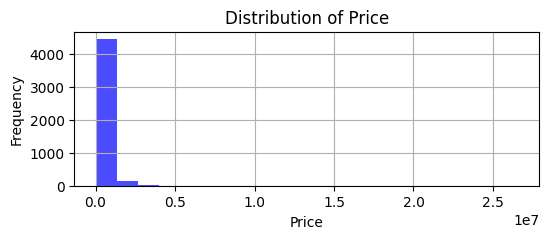

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 2))
plt.hist(df["price"], bins=20, color='blue', alpha=0.7)
plt.grid(True)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

7. Observe the histogram, Does it look like it falls under any probability distribution? Does
it look like a bell curve?

The histogram of the "price" feature does not resemble a bell curve; instead, it shows a right-skewed distribution with a long tail on the higher price side. This suggests that the data is not normally distributed and may have some positive skewness, possibly due to outliers or high-value data points on the right side of the distribution.

8.Use the Shapiro-Wilk test to do a normality test and check if the “price” feature follows
the normal distribution (if the p-value is greater than 0.05 then the feature follows the
Normal distribution)


In [37]:
from scipy.stats import shapiro
stat, p_value = shapiro(df["price"])
if p_value > 0.05:
    print("The 'price' feature follows a normal distribution (p-value =", p_value, ")")
else:
    print("The 'price' feature does not follow a normal distribution (p-value =", p_value, ")")


The 'price' feature does not follow a normal distribution (p-value = 0.0 )


**9. Consider the Hypothesis "The year built has a significant impact on sale price.”. Do a
hypothesis test using a t-test: split into two groups: properties built before 1990 and those
built-in or after 1990. (alpha/confidence interval= 95%)**

In [ ]:
from scipy import stats

before_1990 = df[df['yr_built'] < 1990]['price']
after_1990 = df[df['yr_built'] >= 1990]['price']
t_stat, p_value = stats.ttest_ind(before_1990, after_1990)
alpha = 0.05
print("T-statistic:", t_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: The year built has a significant impact on sale price.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of the year built on sale price.")


T-statistic: -5.014550457612197
P-value: 5.51579911487353e-07
Reject the null hypothesis: The year built has a significant impact on sale price.


**10. Consider the Hypothesis "The year built has a significant impact on sale price.Do a
Hypothesis test using ANOVA: Assume that you have 3 groups: groupA has all houses
built in 1990, groupB has all houses that were built in 2000 and groupC has all houses
built in 2010 (alpha/confidence interval = 95%)**

In [ ]:
from scipy import stats

groupA = df[df['yr_built'] == 1990]['price']
groupB = df[df['yr_built'] == 2000]['price']
groupC = df[df['yr_built'] == 2010]['price']
f_stat, p_value = stats.f_oneway(groupA, groupB, groupC)
alpha = 0.05
print("F-statistic:", f_stat)
print("P-value:", p_value)
if p_value < alpha:
    print("Reject the null hypothesis: The year built has a significant impact on sale price.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of the year built on sale price.")


F-statistic: 4.286625058295787
P-value: 0.015547293538959776
Reject the null hypothesis: The year built has a significant impact on sale price.


**11. Does the ANOVA conclusion change from the t-test or is it the same?**

The conclusions from both the ANOVA and t-test are consistent in this case. Both tests reject the null hypothesis and suggest that the year built has a significant impact on the sale price. Therefore, there is no difference in the conclusion between the two tests.

**12. Calculate the covariance matrix of the numerical features present in the dataset**

In [39]:
import numpy as np
numerical_features = df.select_dtypes(include=[np.number])
covariance_matrix = np.cov(numerical_features, rowvar=False)
print("Covariance Matrix of Numerical Features:")
print(covariance_matrix)


Covariance Matrix of Numerical Features:
[[ 3.17909572e+11  1.02660350e+05  1.44557386e+05  2.33751159e+08
   1.02077552e+09  4.59692113e+04  6.45547323e+03  1.00288560e+05
   1.33319640e+04  1.78683225e+08  5.50679344e+07  3.66404580e+05
  -1.58896099e+07             nan]
 [ 1.02660350e+05  8.26004897e-01  3.88879482e-01  5.20766735e+02
   2.24444017e+03  8.70301672e-02 -2.67165830e-04  7.85469431e-02
   1.54366261e-02  3.79805727e+02  1.40961008e+02  3.84954442e+00
  -5.43710879e+01             nan]
 [ 1.44557386e+05  3.88879482e-01  6.14312773e-01  5.74627928e+02
   3.03298755e+03  2.05223909e-01  5.04307411e-03  1.29316711e-01
  -6.36929815e-02  4.66213556e+02  1.08414371e+02  1.08010070e+01
  -1.65724334e+02             nan]
 [ 2.33751159e+08  5.20766735e+02  5.74627928e+02  9.27767563e+05
   7.27707999e+06  1.78799031e+02  9.56198096e+00  2.33183935e+02
  -4.09821647e+01  7.27839770e+05  1.99927792e+05  8.24128442e+03
  -1.15862844e+05             nan]
 [ 1.02077552e+09  2.244440

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


**13. Create a heatmap of the covariance matrix. What do the colors in the heatmap represent?**

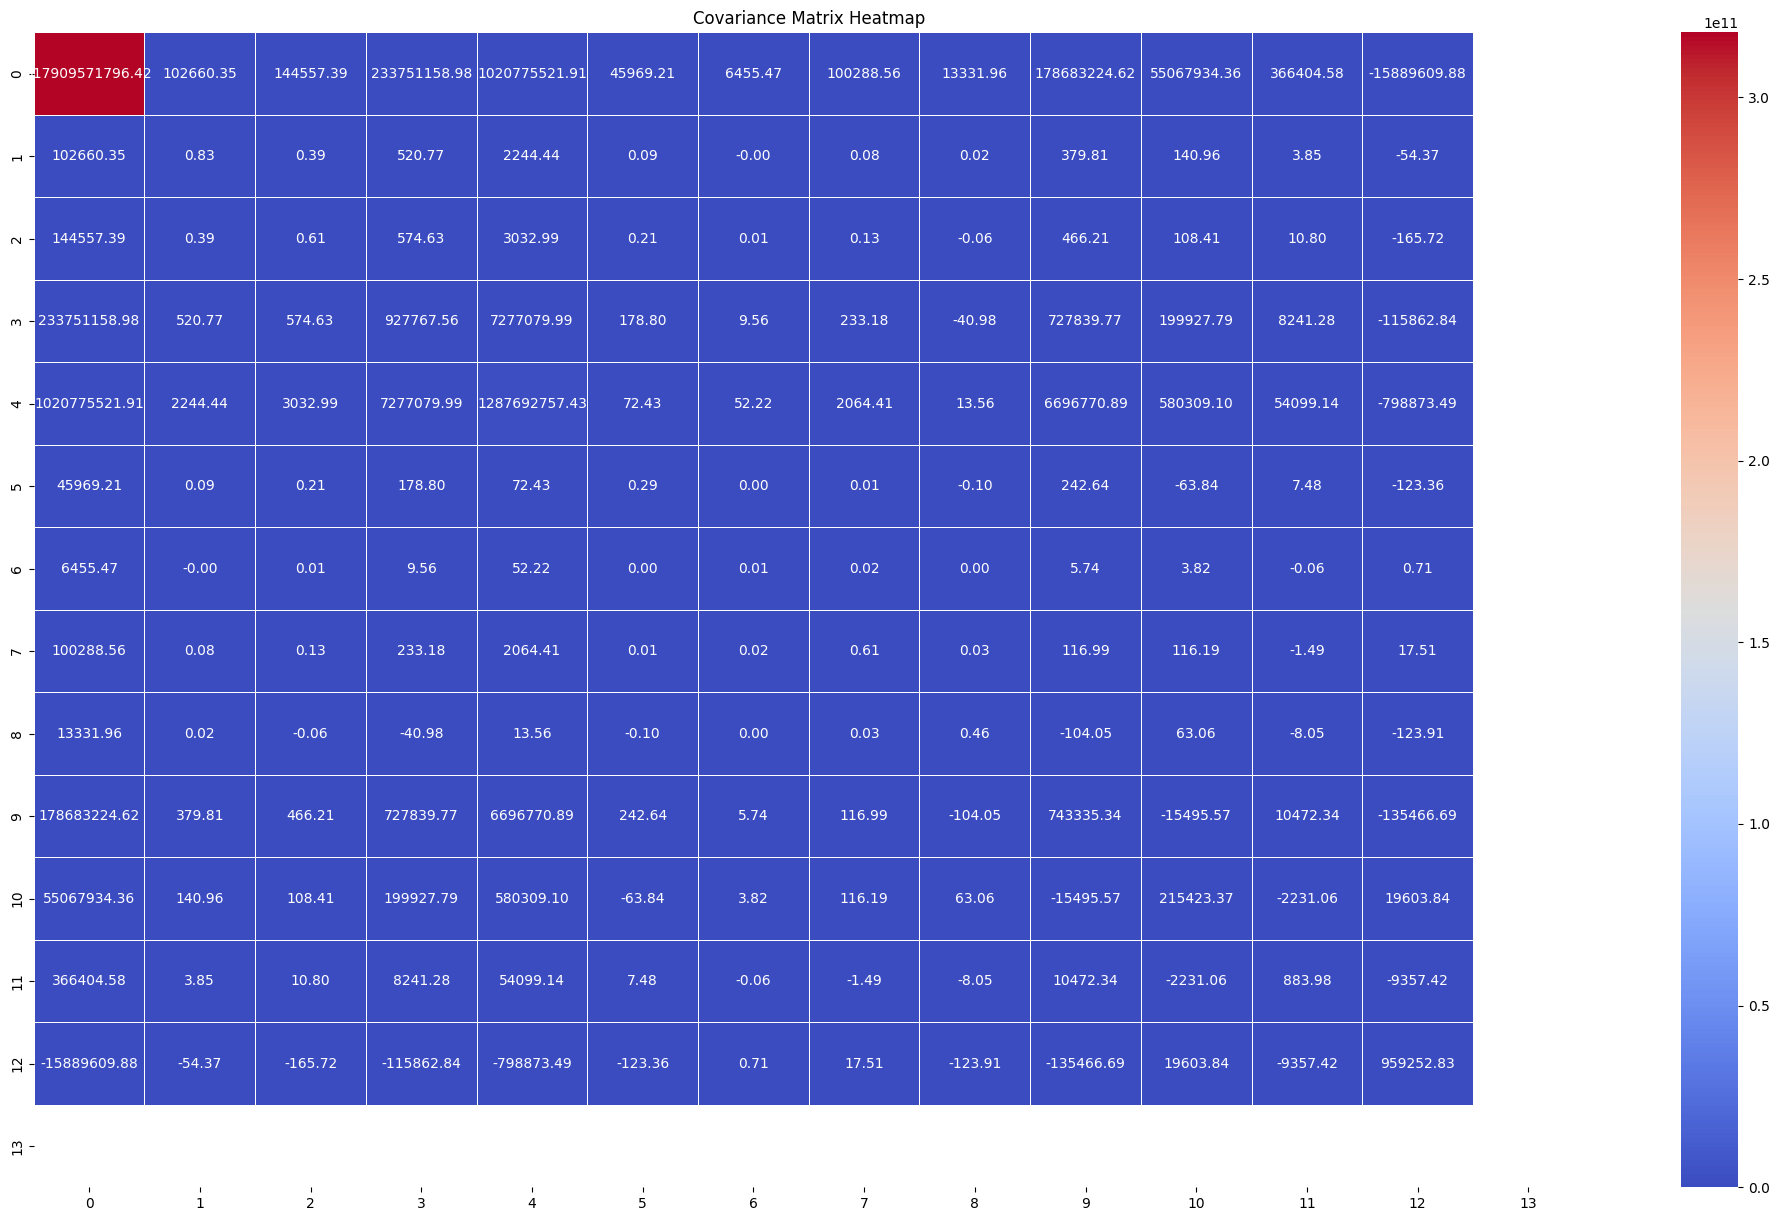

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a clearer heatmap of the covariance matrix
plt.figure(figsize=(25, 15))
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Covariance Matrix Heatmap')
plt.show()

**14. Compute the eigenvalue, eigenvector, and Rank of the covariance matrix**

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
rank = np.linalg.matrix_rank(covariance_matrix)
print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)
print("\nRank of the covariance matrix:", rank)


Eigenvalues:
[ 3.17913145e+11  1.28446478e+09  1.31108057e+06  8.93134507e+05
  2.96182598e+05  6.50782442e+02  5.84849788e-01  4.71240320e-01
  3.29071200e-01  2.33658678e-01  1.27738313e-01  6.13485190e-03
 -1.09884897e-09]

Eigenvectors:
[[ 9.99994359e-01 -3.23035786e-03 -8.51596811e-04 -3.31278978e-04
   1.12866961e-04 -5.91081399e-06 -1.71362133e-07  5.41664603e-08
  -2.44755587e-08 -7.55431140e-08 -2.40552777e-09  8.71000626e-09
   1.19284537e-15]
 [ 3.22942387e-07  1.49266766e-06  3.91643641e-04  2.02274365e-04
  -3.14760225e-04  4.68120277e-04 -7.72572293e-01 -5.78876666e-01
  -8.93143525e-02 -2.29457294e-01 -8.58297018e-02 -6.23757790e-03
   1.04827665e-08]
 [ 4.54737600e-07  2.00176882e-06  4.61433392e-04  1.09888047e-04
  -1.54417958e-04 -7.06651255e-03 -1.35584997e-01 -1.90062172e-01
  -1.26186312e-01  7.66160711e-01  5.85249294e-01  9.67196767e-04
  -3.43713989e-09]
 [ 7.35340568e-04  5.08389398e-03  6.75592283e-01  3.22262450e-01
  -3.26122959e-01  2.38598818e-03  2.57071

**15. Interpret the Eigenvectors in the context of the dataset. What do they represent and their
significance?**

Eigenvectors in the context of your dataset represent directions in which the data varies the most. They're like arrows pointing to the most important patterns in your data.

The first eigenvector (principal component) points to the most significant pattern, the second to the second most, and so on. These patterns help you understand which aspects of your data are most important.

Eigenvectors tell you which original features have the strongest influence on these patterns. They are used to reduce the dimensionality of your data while preserving essential information.

Eigenvectors are orthogonal, meaning they don't overlap or correlate. This makes them useful for separating different patterns in your data.

In summary, eigenvectors help you discover the major patterns in your data and understand which features contribute the most to those patterns, simplifying your data analysis.






**16. Calculate the inverse of the covariance matrix**

In [ ]:
covariance_matrix_inverse = np.linalg.inv(covariance_matrix)
print("Inverse Covariance Matrix:")
print(covariance_matrix_inverse)


Inverse Covariance Matrix:
[[ 4.02141066e-12  2.33410076e-07 -2.30022634e-07 -2.94379596e-09
   2.77979084e-12 -1.60085132e-07 -1.42898246e-06 -1.83773134e-07
  -1.28056491e-07  1.66527002e-09  1.59946406e-09  9.56375963e-09
  -2.64315884e-11]
 [ 2.33410076e-07  2.04523258e+00 -6.99779967e-01 -5.22245530e-03
   2.40928235e-06  1.38457162e-01  1.01201095e+00  1.98099815e-01
  -1.48232089e-01  7.31143742e-03  8.84212681e-03  4.26866088e-03
  -6.54008976e-05]
 [-2.30022634e-07 -6.99779967e-01  5.35024413e+00 -0.00000000e+00
   2.24562713e-06 -1.72051984e+00 -1.48096924e-01 -7.26987962e-02
  -1.67390565e-01 -0.00000000e+00 -5.81236825e-03 -3.24484850e-02
   1.05411176e-04]
 [-1.37699125e-09 -2.03470596e-03 -4.59372577e-03 -2.10634411e+09
  -6.88768855e-08  3.45288923e-03 -6.71602064e-03 -7.34823718e-04
   1.14293111e-04  2.10634411e+09  2.10634411e+09  1.56633936e-05
   4.00859952e-08]
 [ 2.77979084e-12  2.40928235e-06  2.24562713e-06 -7.89217240e-09
   8.36481320e-10  7.33468811e-06  5.28

**17. Discuss the impact of the matrix rank on the feasibility of solving a linear regression
problem using these features**

Full Rank Matrix: If your features are all different and independent (no two features are the same or related), you can solve your linear regression problem easily and get a reliable answer.

Low Rank Matrix: If some features are related to each other (they move together), it can make your linear regression results unstable. You might not get a clear or trustworthy answer because the features are "fighting" with each other.

Too Many Features: If you have more features than data points, it can lead to instability. You might need to reduce the number of features or use special techniques to make your linear regression problem solvable.

If your features are independent, your linear regression is likely to work well. If they are related or you have too many of them, it can cause problems, and you may need to take extra steps to get a reliable solution

**18.  How does the rank relate to multicollinearity among the independent variables? Provide examples from the dataset**

A rank of 12 in your dataset with 16 columns suggests moderate multicollinearity, indicating that some variables are related but not perfectly linearly dependent. To identify multicollinearity, examine variables with high correlation and look for patterns where variables behave similarly. Multicollinearity can complicate analysis, making it challenging to interpret individual variable effects and attribute outcomes accurately. Consider techniques like variable selection, PCA, or regularization to address multicollinearity and enhance analysis stability.


**19. Create a matrix X with the selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
and Y with the target feature and Print matrix X and Y**

In [42]:
selected_features = ['bedrooms', 'sqft_lot', 'floors', 'yr_built']
X = df[selected_features]
Y = df['price']
print("Matrix X (selected features):")
print(X.head())
print("\nMatrix Y (target feature - 'price'):")
print(Y.head())


Matrix X (selected features):
   bedrooms  sqft_lot  floors  yr_built
0         3      7912     1.5      1955
1         5      9050     2.0      1921
2         3     11947     1.0      1966
3         3      8030     1.0      1963
4         4     10500     1.0      1976

Matrix Y (target feature - 'price'):
0     313000.0
1    2384000.0
2     342000.0
3     420000.0
4     550000.0
Name: price, dtype: float64


**20. Compute the transpose of matrix X and print the transpose matrix**

In [ ]:
X_transpose = X.T
print("Transpose of Matrix X:")
print(X_transpose)


Transpose of Matrix X:
            0       1        2       3        4       5       6        7     \
bedrooms     3.0     5.0      3.0     3.0      4.0     2.0     2.0      4.0   
sqft_lot  7912.0  9050.0  11947.0  8030.0  10500.0  6380.0  2560.0  35868.0   
floors       1.5     2.0      1.0     1.0      1.0     1.0     1.0      2.0   
yr_built  1955.0  1921.0   1966.0  1963.0   1976.0  1938.0  1976.0   1989.0   

             8       9     ...    4590    4591    4592    4593    4594  \
bedrooms      3.0     4.0  ...     4.0     3.0     4.0     3.0     3.0   
sqft_lot  88426.0  6200.0  ...  8331.0  5752.0  8169.0  4600.0  7223.0   
floors        1.0     1.5  ...     2.0     1.0     2.0     2.0     2.0   
yr_built   1985.0  1945.0  ...  1991.0  1945.0  1993.0  2013.0  1994.0   

            4595    4596    4597    4598    4599  
bedrooms     3.0     3.0     3.0     4.0     3.0  
sqft_lot  6360.0  7573.0  7014.0  6630.0  8102.0  
floors       1.0     2.0     2.0     1.0     2.0  
yr_bui

**21. solve the linear system of equations 'X * a = Y,' where 'a' represents the coefficients**

In [43]:
import numpy as np
coefficients_a = np.linalg.solve(X.T @ X, X.T @ Y)
print("Coefficients 'a':")
print(coefficients_a)



Coefficients 'a':
[ 1.11398600e+05  5.98070191e-01  1.28189372e+05 -1.52885306e+01]


**22. Once you've obtained the coefficient 'a,' create a scatter plot that visually represents the
relationship between one of the selected features and the target variable 'price.' Include a
regression line on the plot to illustrate the linear relationship. Provide insights and
interpretations based on the scatter plot.**

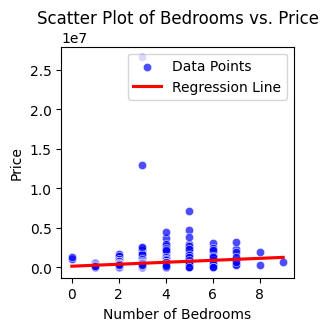

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(3, 3))
sns.scatterplot(x='bedrooms', y='price', data=data, color='blue', alpha=0.7, label='Data Points')
sns.regplot(x='bedrooms', y='price', data=data, color='red', scatter=False, label='Regression Line')
plt.title('Scatter Plot of Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend()
plt.show()
